In [25]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("datasets_596958_1073629_Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [19]:
df['salary'].fillna(0,inplace = True)

In [20]:
df.groupby( 'status' ).mean()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
status,,,,,,,
Not Placed,110.477612,57.544030,58.395522,61.134179,69.587910,61.612836,0.000000
Placed,106.878378,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405


In [21]:
def plot(df,x,y):
    plt.Figure(figsize =(10,10))
    sns.boxplot(x = df[x],y= df[y])
    g = sns.FacetGrid(df, row = y)
    g = g.map(plt.hist,x)
    plt.show()

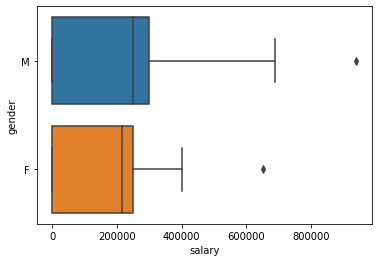

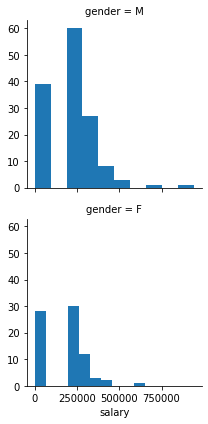

In [26]:
plot(df,"salary", "gender")

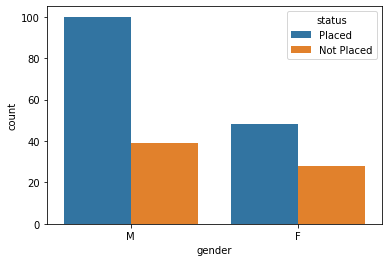

In [31]:
sns.countplot(x=df["gender"], hue=df["status"])

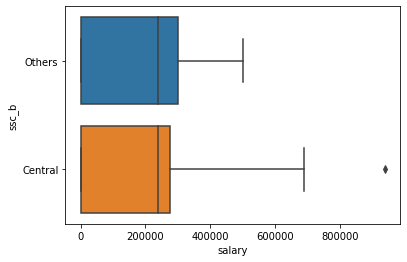

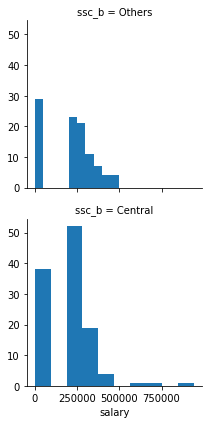

In [33]:
plot(df,"salary","ssc_b")


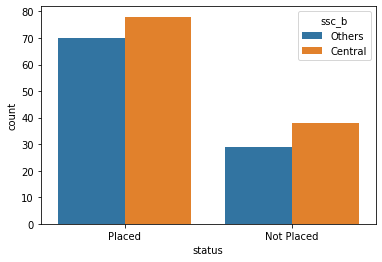

In [34]:
sns.countplot(df['status'],hue=df['ssc_b'])


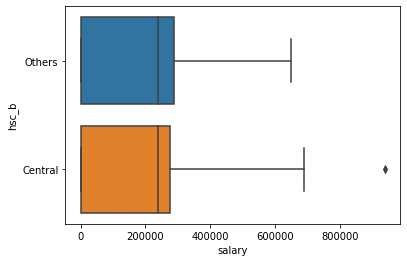

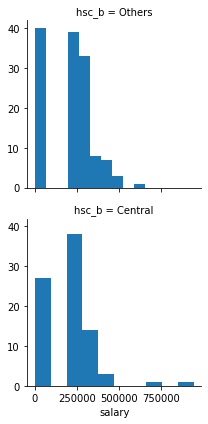

In [35]:
plot(df,"salary","hsc_b")

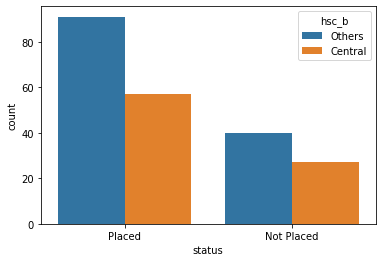

In [36]:
sns.countplot(df['status'],hue=df['hsc_b'])


In [39]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['ssc_p'], df['hsc_p'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.511


In [41]:
corr, _ = pearsonr(df['salary'], df['degree_p'])
print(corr)

0.40837078117657


In [46]:
data1 = df
#Gender Column
data1['gender']=data1['gender'].replace('M',0)
data1['gender']=data1['gender'].replace('F',1)
#SSC_B column
data1['ssc_b']=data1['ssc_b'].replace('Central',0)
data1['ssc_b']=data1['ssc_b'].replace('Others',1)
#HSC_B column
data1['hsc_b']=data1['hsc_b'].replace('Central',0)
data1['hsc_b']=data1['hsc_b'].replace('Others',1)
#HSC_S column
data1['hsc_s']=data1['hsc_s'].replace('Commerce',0)
data1['hsc_s']=data1['hsc_s'].replace('Science',1)
data1['hsc_s']=data1['hsc_s'].replace('Arts',1)
#degree_t column
data1['degree_t']=data1['degree_t'].replace('Comm&Mgmt',0)
data1['degree_t']=data1['degree_t'].replace('Sci&Tech',1)
data1['degree_t']=data1['degree_t'].replace('Others',1)                                   
#workex column
data1['workex']=data1['workex'].replace('Yes',0)
data1['workex']=data1['workex'].replace('No',1)
#specialisation column
data1['specialisation']=data1['specialisation'].replace('Mkt&Fin',0)
data1['specialisation']=data1['specialisation'].replace('Mkt&HR',1)
#stats column
data1['status']=data1['status'].replace('Placed',0)
data1['status']=data1['status'].replace('Not Placed',1)

In [50]:
data1=data1.drop(columns=['salary','sl_no'])

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data1.drop(columns=['status'])
y = data1.status

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
model.score(X_test,y_test)

0.8837209302325582